In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.test.gpu_device_name() #run to make sure tensorflow is connected to gpu

import numpy as np
import pandas as pd
import cv2  
import os  
from random import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show
%matplotlib inline

In [ ]:
!unzip data-20210103T084055Z-001.zip


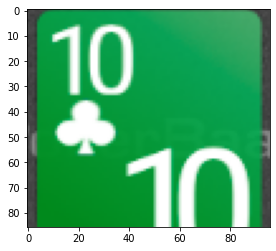

In [ ]:
image = imread('data/train/10C.png')
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
imshow(images[0])
show()

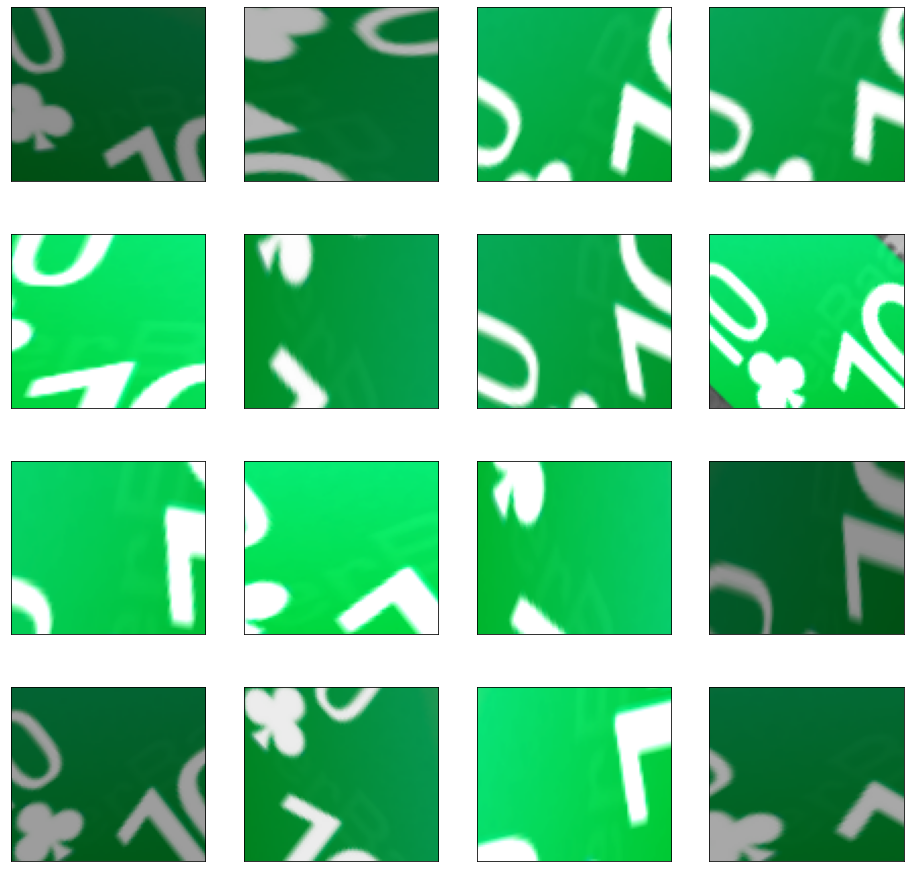

In [ ]:

data_generator = ImageDataGenerator(rotation_range=90, brightness_range=(0.5, 1.5), shear_range=15.0, zoom_range=[.3, .8])
data_generator.fit(images)
image_iterator = data_generator.flow(images)

plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_iterator.next()[0].astype('int'))
plt.show()


In [ ]:

data=[]

for i, img in tqdm(enumerate(os.listdir(r'data/train/'))):
    label=i
    
    img = cv2.imread('data/train/'+img, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (180, 180))
    imgs = img.reshape((1, img.shape[0], img.shape[1], 1))
    data_generator = ImageDataGenerator(rotation_range=90, brightness_range=(0.5, 1.5), shear_range=15.0, zoom_range=[.3, .8])
    data_generator.fit(imgs)
    image_iterator = data_generator.flow(imgs)
    
    for x in range(750):
        img_transformed=image_iterator.next()[0].astype('int')/255
        data.append([img_transformed, label])

shuffle(data)



52it [01:57,  2.25s/it]


In [ ]:

train=r'data/train/'
test=r'data/test/'

#

In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
data = (train,test)
train=data[:37000]
test=data[37000:]

train_X=[]
train_y=[]
for x in train:
    train_X.append(x[0]) 
    train_y.append(x[1])
    
test_X=[]
test_y=[]
for x in test:
    test_X.append(x[0]) 
    test_y.append(x[1])
    
train_X=np.array(train_X)
train_y=np.array(train_y)

test_X=np.array(test_X)
test_y=np.array(test_y)

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

epochs=250
batch_size=32

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(52, activation='softmax')
])
#model.fit(train,test)
#model.summary()

cp = tf.keras.callbacks.ModelCheckpoint(filepath="250epochs_conv.h5",
                               save_best_only=True,
                               verbose=0)
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.fit(train_X, train_y, epochs=10, validation_data=(test_X, test_y))




Epoch 1/10


ValueError: ignored